Цель: Изучить применение методов по поиску выбросов в данных, попрактиковаться в обработке экстремальных значений.

Описание задания:
В домашнем задании нужно решить задачу классификации типа стекол. Данные для обучения моделей можно скачать с сайта. Целевая переменная – тип стекла «Type». Остальные признаки описывают химические элементы в составе материала. Датасет нужно исследовать на наличие выбросов, провести EDA.

1.
Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).

In [ ]:
import pandas as pd
data = pd.read_csv('/content/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


2.
Проведите первичный анализ.
а) Проверьте количество записей для каждого класса. Сделайте вывод.

In [ ]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [ ]:
data_before_count =data['Type'].value_counts()
data_before_count

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [ ]:
data['Type'].value_counts(normalize=True)
# классы не сбалансированы. очень мало значений 5 и 6 классов.

2    0.355140
1    0.327103
7    0.135514
3    0.079439
5    0.060748
6    0.042056
Name: Type, dtype: float64

In [ ]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

3.
Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['Type']),data['Type'],test_size=0.2, random_state=7)
X_train.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
133,1.51800,13.71,3.93,1.54,71.81,0.54,8.21,0.00,0.15
125,1.51872,12.93,3.66,1.56,72.51,0.58,8.55,0.00,0.12
200,1.51508,15.15,0.00,2.25,73.50,0.00,8.34,0.63,0.00
66,1.52152,13.05,3.65,0.87,72.22,0.19,9.85,0.00,0.17
166,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.00,0.00


4.
Обучите модель дерева решений RandomForestClassifier на обучающем множестве.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=7)
forest.fit(X_train, y_train)
forest.score(X_train, y_train)

1.0

5.
Для тестового множества предскажите тип стекла и сравните с истинным значением, посчитав точность предсказания модели (accuracy).

In [ ]:
X_test_before, y_test_before = X_test, y_test
forest.score(X_test, y_test)


0.627906976744186

6.
Обработайте выбросы в данных.
а) Визуализируйте распределение значений для каждой переменной. Можно использовать функции sns.boxplot, sns.distplot. Есть ли признаки с нормальным распределением?
b) Исследуйте признаки на выбросы несколькими способами.
c) Удалите выбросы. *Посчитайте процент удаленных записей от общего числа записей для каждого класса.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


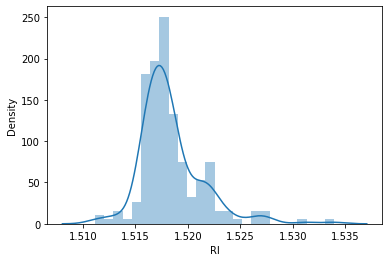

In [ ]:
data_after = data.copy()
import seaborn as sns
sns.distplot(data['RI'])
# норм распределение

In [ ]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(min_samples = 4, eps = 1000)
clusters = outlier_detection.fit_predict(data_after[['RI']])
list(clusters).count(-1)
# не ищет выбросы. попробуем другим методом

0

In [ ]:
len(data_after), len(data)

(214, 214)

In [ ]:
# изолирующий лес нашёл 37 точек, применем его
from sklearn.ensemble import IsolationForest
clf = IsolationForest( max_samples=100, random_state = 1, contamination= 'auto')
preds = clf.fit_predict(data_after[['RI']])
# list(preds).count(-1)  == 37 точек
data_after = data_after[preds == 1]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


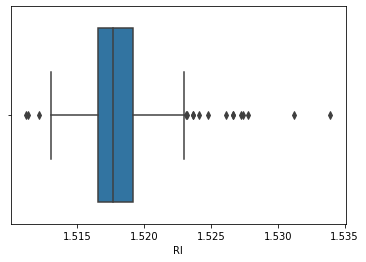

In [ ]:
sns.boxplot(data['RI']);

In [ ]:
len(data_after)

177

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


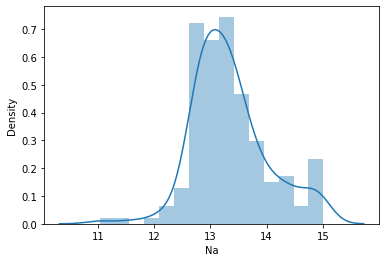

In [ ]:
sns.distplot(data_after['Na'])
# норм распределение

In [ ]:
from sklearn.cluster import DBSCAN
outlier_detection = DBSCAN(min_samples = 1, eps = 1000)
clusters = outlier_detection.fit_predict(data_after[['Na']])
list(clusters).count(-1)

0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


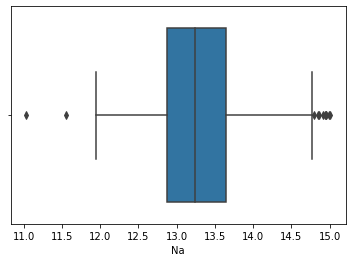

In [ ]:
sns.boxplot(data_after['Na'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


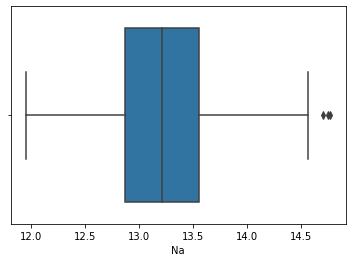

In [ ]:
# найду выбросы по iqr:
import numpy as np
q1 = np.percentile(data_after['Na'],25, interpolation = 'midpoint')
q3 = np.percentile(data_after['Na'],75, interpolation = 'midpoint')
iqr = q3 - q1
data_after = data_after[(data_after['Na'] <= q3 + 1.5 * iqr) & (data_after['Na'] >= q1 - 1.5 * iqr)]
sns.boxplot(data_after['Na']);

In [ ]:
len(data_after)

166

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


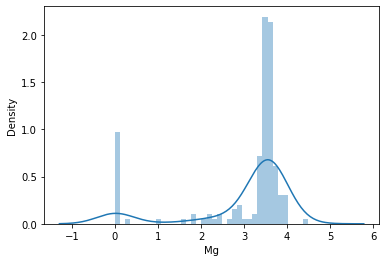

In [ ]:
sns.distplot(data_after['Mg'])
# меньше похоже на нормальное

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


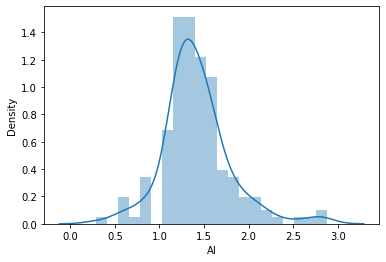

In [ ]:
sns.distplot(data_after['Al'])
# норм

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


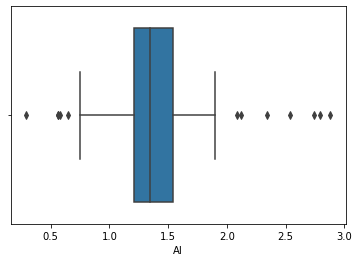

In [ ]:
data_after = data_after[data_after['Al'] < 3]
sns.boxplot(data_after['Al'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


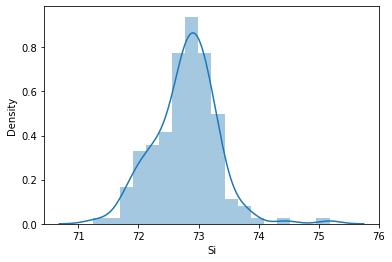

In [ ]:
sns.distplot(data_after['Si'])
data_after = data_after[data_after['Si'] < 75]
# норм

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


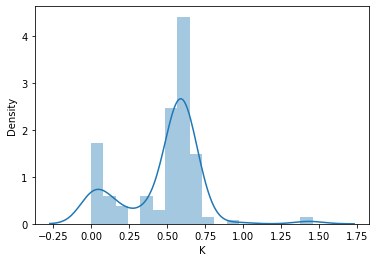

In [ ]:
sns.distplot(data_after['K'])
# не совсем нормальное, но близко

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


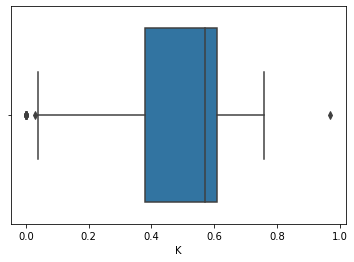

In [ ]:

data_after = data_after[data_after['K'] < 1]
sns.boxplot(data_after['K'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


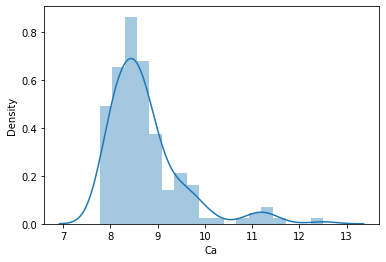

In [ ]:
sns.distplot(data_after['Ca'])
# норм

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


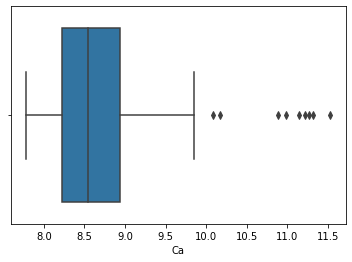

In [ ]:
data_after = data_after[data_after['Ca'] < 12]
sns.boxplot(data_after['Ca']);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


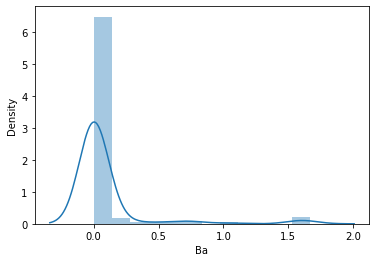

In [ ]:
sns.distplot(data_after['Ba'])
# не похоже на норм

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


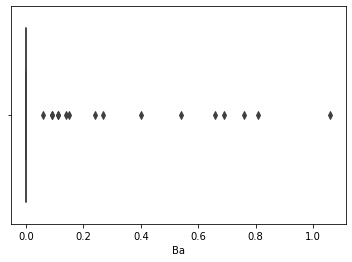

In [ ]:
data_after = data_after[data_after['Ba'] < 1.5]
sns.boxplot(data_after['Ba']);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


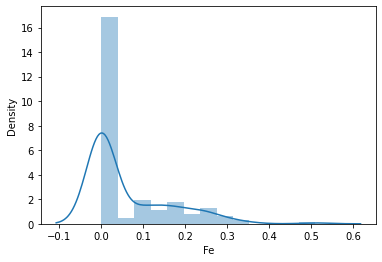

In [ ]:
sns.distplot(data_after['Fe'])
# близко к норм

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


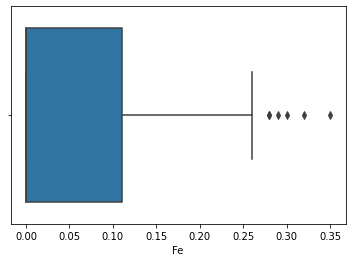

In [ ]:
data_after = data_after[data_after['Fe'] < 0.4]
sns.boxplot(data_after['Fe']);

In [ ]:
data_after_count = data_after['Type'].value_counts()
data_after_count

2    63
1    60
3    16
6     6
7     6
5     5
Name: Type, dtype: int64

In [ ]:
# процентное отношение потерь каждого класса:
# самое большое кол-вл потерь по 5 классу
(data_before_count - data_after_count) * 100/data_before_count

1    14.285714
2    17.105263
3     5.882353
5    61.538462
6    33.333333
7    79.310345
Name: Type, dtype: float64

7.
Повторите п. 4, п. 5.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_after.drop(columns=['Type']),data_after['Type'],test_size=0.2, random_state=7)
# X_train.head()
forest = RandomForestClassifier(random_state=7)
forest.fit(X_train, y_train)
forest.score(X_train, y_train)

1.0

In [ ]:
forest.score(X_test, y_test)
# если тест, очищенный от выбросов, 
# модель также обучена на данных без выбросов

0.84375

In [ ]:
forest.score(X_test_before, y_test_before)
# на тесте с выбросами - модель обучена на данных без выбросов!

0.8372093023255814

8.
Сформулируйте выводы по проделанной работе.
а) Кратко опишите, какие преобразования были сделаны с данными.
b) Сравните точность двух моделей.
c) Напишите свое мнение, нужно ли исследовать данные на выбросы, для чего это делается, плюсы и минусы подхода.
Для получения зачета по этому домашнему заданию минимально должны быть реализованы методы по поиску выбросов и построены две модели: «до» и «после» обработки экстремальных значений.

**Выводы**

точность модели на тестовых данных выросла на 20 %
а) упорно пыталась каждый признак почистить кластеризацией dbscan, но упорно не получалось. применяла просто отброс по визуализированным даным, 
изолирующий лес и удаление на основе квантилей <+- 1.5 iqr
b) точность на тесте выросла на 20 процентов, даже при тестовых данных, не очищенных от выбросов - весьма удивительно) 
с) минус подхода - потеря данных. по признаку 7 я потеряла 80 процетов данных, не понимаю как модель вообще продолжает работать.
плюсы - повышение качества модели, даже без чистки тестовых данных